In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [127]:
df = pd.read_csv('../data/cardio_train.csv',sep=";")

In [130]:
df.describe().to_csv('../data/description.csv')

In [6]:
#df.sample(frac=0.3, replace=False).to_csv("../data/out/testData.csv")

In [7]:
# age: 1 - women, 2 - men
#cholesterol: (1: normal, 2: above normal, 3: well above normal)
#gluc: (1: normal, 2: above normal, 3: well above normal)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.isnull().values.any()

False

def age(df):
    df['age'] = (df['age']/365).round().astype('int')
    df2 = df.copy()
    bins= [30,35,40,45,50,55,60,65]
    labels = ["30-35","35-40","40-45","45-50","50-55","55-60","60-65"]
    df2['AgeGroup'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)
    sns.countplot(x='AgeGroup', hue='cardio', data = df2)
    plt.savefig('../data/out/ageGroup.png')
    return

age(df)

In [9]:
df['age'] = (df['age'] / 365).round().astype('int')

In [10]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
bins= [30,35,40,45,50,55,60,65]
labels = ["30-35","35-40","40-45","45-50","50-55","55-60","60-65"]
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [12]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeGroup
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,50-55
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55-60
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,50-55
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,45-50
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,45-50


In [13]:
height = df['height']

In [54]:
gender1 = df[df['gender'] == 1] ## female

q1 = np.percentile(gender1['height'], 25)
q3 = np.percentile(gender1['height'], 75)
IQR = q3-q1
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
print(low,high)

female_no_outlier = gender1[(gender1['height'] > low) & (gender1['height'] < high)]
female_no_outlier.head()

143.5 179.5


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeGroup,ponderIndex,PIGroup
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55-60,22.389538,19-23
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,50-55,14.247155,11-15
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,45-50,14.750754,11-15
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,60-65,19.460050,19-23
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,60-65,24.031672,23-27


In [126]:
gender2 = df[df['gender'] == 2] ## male


q1 = np.percentile(gender2['height'], 25)
q3 = np.percentile(gender2['height'], 75)
IQR = q3-q1
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
print(low,high)
male_no_outlier = gender2[(gender2['height'] > low) & (gender2['height'] < high)]
male_no_outlier.head()
male_no_outlier.shape

150.0 190.0


(24245, 16)

In [57]:
male_height = male_no_outlier['height']
female_height = female_no_outlier['height']

In [97]:
#change to median
mheight_median = male_height.median()
mheight_median

170.0

In [94]:
wheight_median = female_height.median()
wheight_median

161.0

In [15]:
#interquartile range
height.std()

8.210126364538139

In [76]:
#separate men and women
f0_m = pd.Series(np.random.normal(male_height.mean(),male_height.std(),len(male_height))).sort_values()
f0_m

2681     144.345802
4791     146.723129
6549     146.835952
692      147.007700
19978    147.132734
            ...    
18323    193.228982
21230    194.260873
8417     195.466685
8264     196.201668
15771    197.000431
Length: 24245, dtype: float64

In [77]:
#probability density
f0_w = pd.Series(np.random.normal(female_height.mean(),female_height.std(),len(female_height))).sort_values()
f0_w

7548     134.900667
17218    136.365770
8945     137.823928
1318     137.845185
42182    137.885806
            ...    
7248     185.595870
36723    185.619318
5861     185.971857
1253     186.834327
19244    187.478854
Length: 45033, dtype: float64

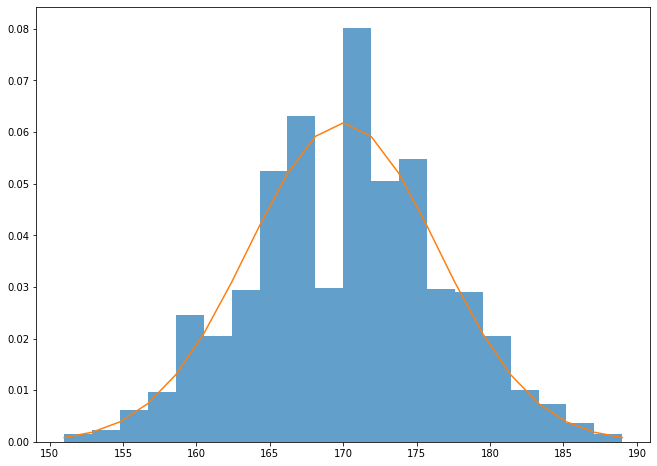

In [122]:
#male
_,bins,_ = plt.hist(male_height,20,density=1,alpha=0.7)
mu,sigma = norm.fit(male_height)
normal_line = norm.pdf(bins,mheight_median,sigma)
plt.plot(bins,normal_line)

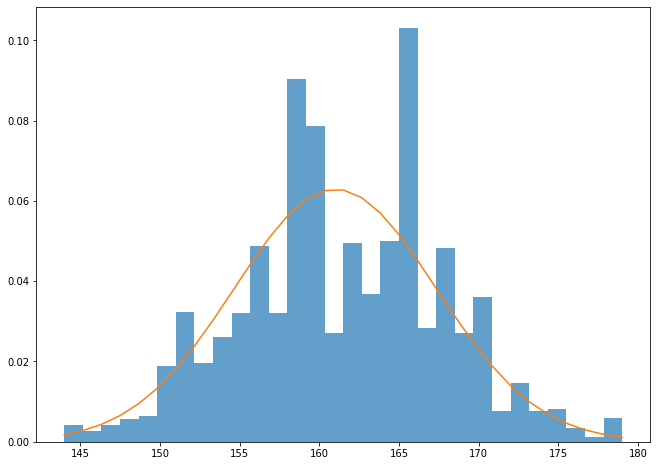

In [100]:
#female
_,bins,_ = plt.hist(female_height,30,density=1,alpha=0.7)
mu,sigma = norm.fit(female_height)
normal_line = norm.pdf(bins,wheight_median,sigma)
plt.plot(bins,normal_line)

In [111]:
#height of the histgram
y_m = male_height.sort_values()
y_w = female_height.sort_values()

In [123]:
len(np.log(y_w)-np.log(f0_w))

61030

In [114]:
#male
p0_m = np.exp(np.mean(np.log(y_m)-np.log(f0_m)))
print(p0_m)

#standard error
SE_m = np.exp(np.std(np.log(y_m)-np.log(f0_m))/(len(y_m)**(1/2)))-1
print(SE_m)

1.0005062825361324
0.00034015220123473355


In [115]:
#female
p0_w = np.exp(np.mean(np.log(y_w)-np.log(f0_w)))
print(p0_w)

SE_w = np.exp(np.std(np.log(y_w)-np.log(f0_w))/(len(y_w)**(1/2)))-1
print(SE_w)

1.0004820673382147
0.000262500083076489


In [84]:
#robust estimate

#move threshold: false positive rate (false disvovery rate), number of height below the threshold 
#and number of height above the threshold to determine the outliers

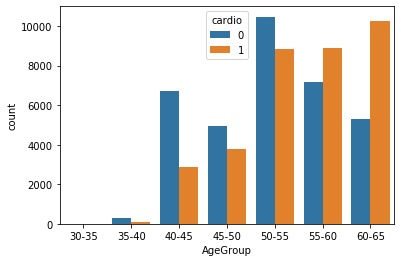

In [23]:
sns.countplot(x='AgeGroup', hue='cardio', data = df)

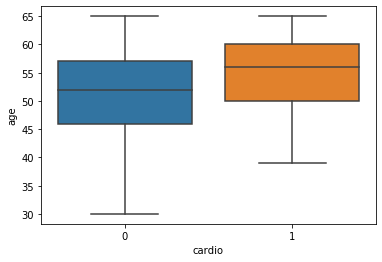

In [24]:
sns.boxplot(x='cardio',y='age',data=df)

In [25]:
rcParams['figure.figsize'] = 11, 8

In [26]:
cardio = df[df.cardio == 1]
noncardio = df[df.cardio == 0]

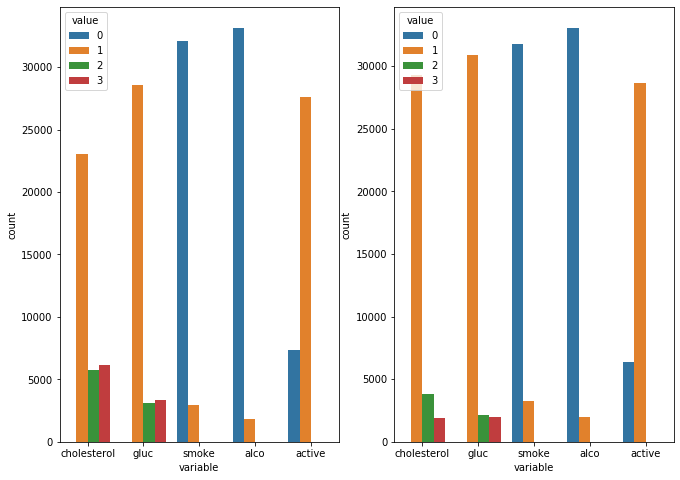

In [27]:
fig, ax =plt.subplots(1,2)
cardio_cate = cardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(cardio_cate),ax=ax[0])
noncardio_cate = noncardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(noncardio_cate),ax=ax[1])

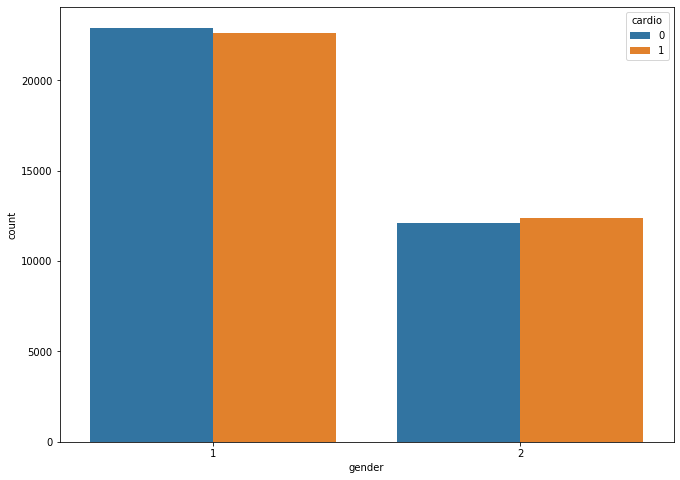

In [28]:
sns.countplot(x='gender', hue='cardio', data = df)

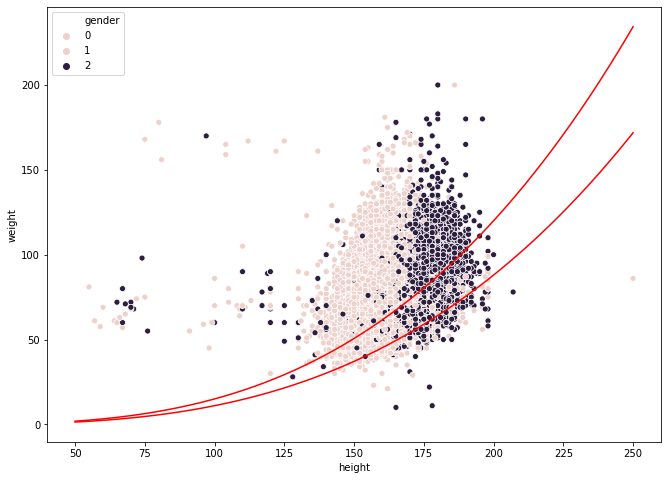

In [29]:
line_x1 = np.linspace(50, 250, 1000)
line_y1 = 11*((line_x1/100)**3)
line_x2 = np.linspace(50, 250, 1000)
line_y2 = 15*((line_x1/100)**3)

sns.scatterplot(x='height',y='weight', hue='gender', data = df)
plt.plot(line_x1, line_y1, color='r')
plt.plot(line_x2, line_y2, color='r')
plt.show()

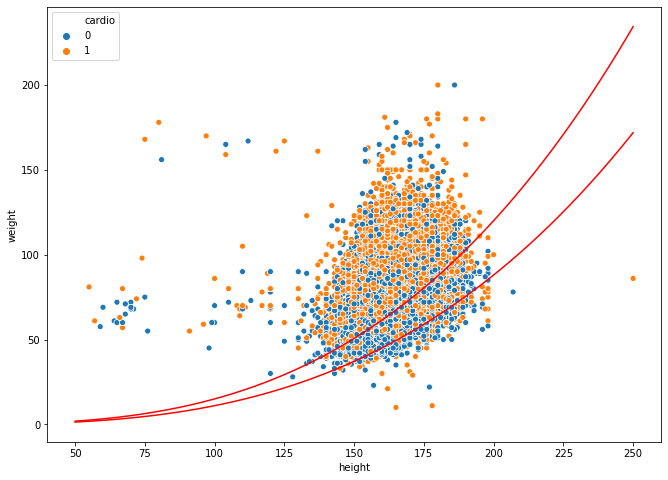

In [53]:
line_x1 = np.linspace(50, 250, 1000)
line_y1 = 11*((line_x1/100)**3)
line_x2 = np.linspace(50, 250, 1000)
line_y2 = 15*((line_x1/100)**3)

line_x3 = np.linspace(50, 250, 1000)
line_y3 = 15*((line_x1/100)**2)
line_x4 = np.linspace(50, 250, 1000)
line_y4 = 50*((line_x1/100)**2)


sns.scatterplot(x='height',y='weight', hue='cardio', data = df)

plt.plot(line_x1, line_y1, color='r')
plt.plot(line_x2, line_y2, color='r')
#plt.plot(line_x3, line_y3, color='b')
#plt.plot(line_x4, line_y4, color='b')

plt.show()

In [52]:
df['ponderIndex'] = df['weight']/(df['height']/100)**3

In [32]:
bins= [0,3,7,11,15,19,23,27,31,35,39,44]
labels = ["0-3","3-7","7-11","11-15","15-19","19-23","23-27","27-31","31-35","35-39","39-44"]
df['PIGroup'] = pd.cut(df['ponderIndex'], bins=bins, labels=labels, right=False)

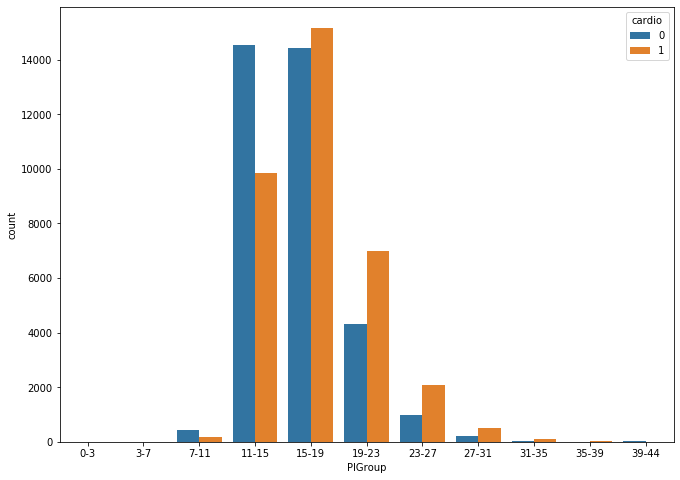

In [33]:
sns.countplot(x='PIGroup', hue='cardio', data = df)

In [34]:
df['ponderIndex'].describe()

count    70000.000000
mean        16.894275
std          5.936442
min          1.950440
25%         14.404297
50%         15.994250
75%         18.554687
max        486.851991
Name: ponderIndex, dtype: float64

In [81]:
df = df.drop(df[df.ponderIndex > 45].index)

(array([1.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00, 1.3000e+01,
        4.0000e+00, 1.2000e+01, 2.4000e+01, 5.4000e+01, 9.5000e+01,
        3.7500e+02, 5.2500e+02, 2.0060e+03, 3.6630e+03, 4.5370e+03,
        7.1210e+03, 9.9910e+03, 5.9120e+03, 1.0370e+04, 1.1869e+04,
        3.3280e+03, 4.4430e+03, 2.8280e+03, 1.2970e+03, 6.7800e+02,
        4.9200e+02, 1.2800e+02, 8.8000e+01, 2.0000e+01, 1.2000e+01,
        1.8000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([117.  , 119.66, 122.32, 124.98, 127.64, 130.3 , 132.96, 135.62,
        138.28, 140.94, 143.6 , 146.26, 148.92, 151.58, 154.24, 156.9 ,
        159.56, 162.22, 164.88, 167.54, 170.2 , 172.86, 175.52, 178.18,
        180.84, 183.5 , 186.16, 188.82, 191.48, 194.14, 196.8 , 199.46,
        202.12, 204.78, 207.44

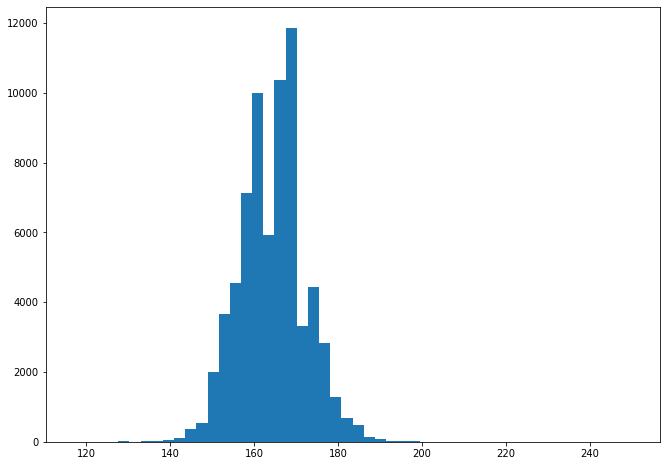

In [82]:
#try empirical null
plt.hist(df['height'],bins=50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Side-by-Side Histogram')

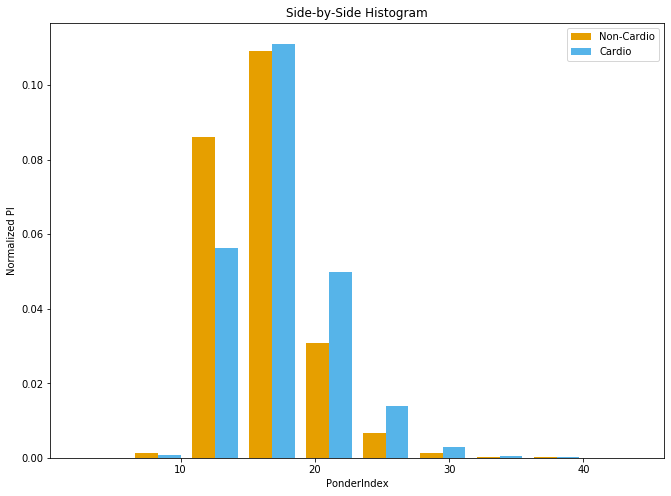

In [83]:
x1 = list(df[df['cardio'] == 0]['ponderIndex'])
x2 = list(df[df['cardio'] == 1]['ponderIndex'])

colors = ['#E69F00', '#56B4E9']
names = ['Non-Cardio', 'Cardio']

plt.hist([x1, x2], bins = 10, normed=True,
         color = colors, label=names)

plt.legend()
plt.xlabel('PonderIndex')
plt.ylabel('Normalized PI')
plt.title('Side-by-Side Histogram')

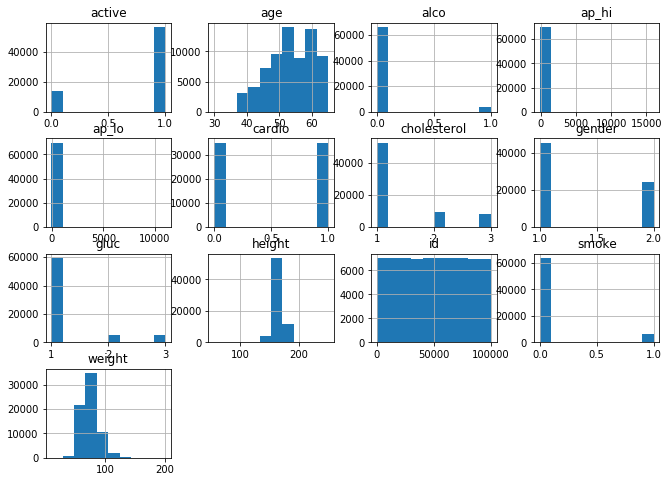

In [229]:
df.hist()
plt.show()

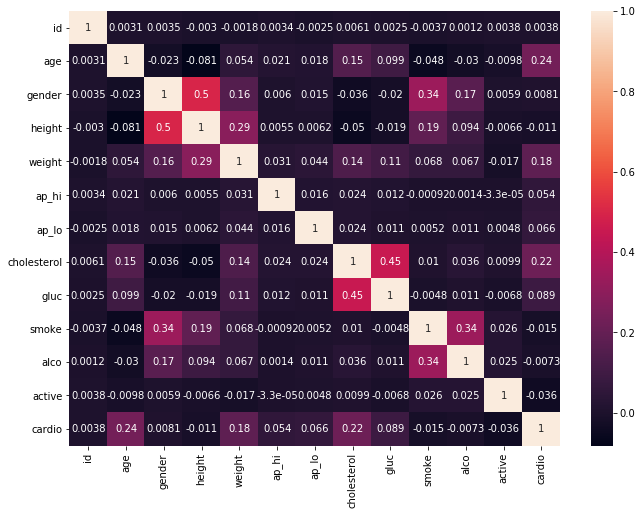

In [219]:
df = pd.read_csv('../data/cardio_train.csv',sep=";")
df['age'] = (df['age'] / 365).round().astype('int')
corr = df.corr()
f, ax = plt.subplots()
sns.heatmap(corr, annot=True, ax=ax)

In [86]:
cardio_corr = df.corr()['cardio'].drop('cardio').sort_values(ascending=False).abs()
cardio_corr

age            0.237749
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco           0.007330
height         0.010821
smoke          0.015486
active         0.035653
Name: cardio, dtype: float64

In [87]:
##logistic regression model

In [88]:
threshold = [0.002, 0.005, 0.01, 0.05, 0.1, 0.2]

In [89]:
for i in threshold:
    print(list(cardio_corr[cardio_corr > i].index))

['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender', 'id', 'alco', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender', 'alco', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi']
['age', 'cholesterol', 'weight']
['age', 'cholesterol']


In [90]:
model = LogisticRegression()

In [91]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
FPR_lst = []
TPR_lst = []
FDR_lst = []

for i in threshold:
    features = cardio_corr[cardio_corr > i].index
    model.fit(X_train[features],y_train)
    prediction = model.predict(X_test[features])
    
    TP_ = np.logical_and(prediction, y_test)
    FP_ = np.logical_and(prediction, np.logical_not(y_test))
    TN_ = np.logical_and(np.logical_not(prediction), np.logical_not(y_test))
    FN_ = np.logical_and(np.logical_not(prediction), y_test)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    FPR = FP/(FP+TN)
    FPR_lst.append(FPR)
    
    TPR = TP/(TP+FN)
    TPR_lst.append(TPR)

    FDR = FP/(FP+TP)
    FDR_lst.append(FDR)

    print(accuracy_score(prediction, y_test))

0.7053333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7073333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.704952380952381
0.7174761904761905
0.6373333333333333
0.6217142857142857


In [93]:
FPR_lst, TPR_lst

([0.22613987635239569,
  0.2481646058732612,
  0.24777820710973725,
  0.22826506955177744,
  0.3234157650695518,
  0.3422527047913447],
 [0.6387114951164538,
  0.6640683696468821,
  0.6589969947407964,
  0.664725770097671,
  0.5991735537190083,
  0.5866829451540195])

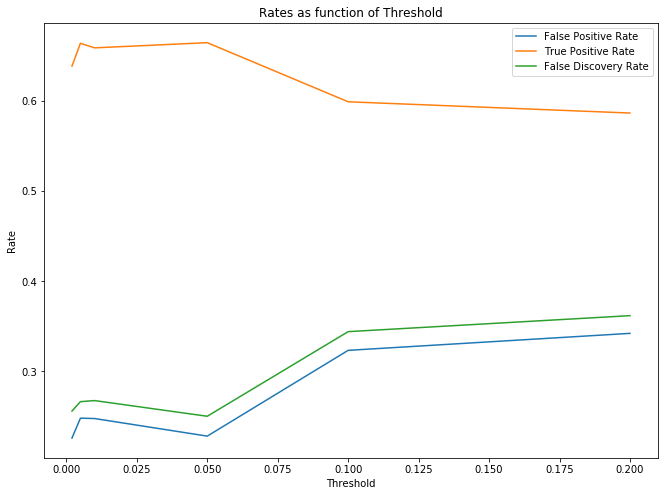

In [94]:
# line 1 points
x1 = threshold
y1 = FPR_lst
# plotting the line 1 points 
plt.plot(x1, y1, label = "False Positive Rate")


# line 2 points
x2 = threshold
y2 = TPR_lst
# plotting the line 2 points 
plt.plot(x2, y2, label = "True Positive Rate")

# line 3 points
x3 = threshold
y3 = FDR_lst
# plotting the line 2 points 
plt.plot(x3, y3, label = "False Discovery Rate")

plt.xlabel('Threshold')
# Set the y axis label of the current axis.
plt.ylabel('Rate')
# Set a title of the current axes.
plt.title('Rates as function of Threshold')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [95]:
## coefficient

from statsmodels.discrete.discrete_model import Logit

Logit(y_train,X_train).fit().summary()

Optimization terminated successfully.
         Current function value: 0.601520
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48988
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.1322
Time:                        21:26:31   Log-Likelihood:                -29474.
converged:                       True   LL-Null:                       -33963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
id              -7e-07   3.43e-07     -2.041      0.041   -1.37e-06   -2.78e-08
age             0.0359      0.001     24.915      0.000       0.033       0.039
gender          0.2842      0.024     11.970      0.000       0.238       0.331
height         -0.0501      0.001    -68.739      0.000      -0.052      -0.049
weight          0.0184      0.001     23.600      0.000       0.017       0.020
ap_hi           0.0343      0.001     50.434      0.000       0.033       0.036
ap_lo           0.0004   9.21e-05      4.500      0.000       0.000       0.001
cholesterol     0.5024      0.018     28.449      0.000       0.468       0.537
gluc           -0.1465      0.020     -7.333      0.000      -0.186      -0.107
smoke          -0.1072      0.039     -2.759      0.006      -0.183      -0.031
alco           -0.1353      0.047     -2.863      0.004      -0.228      -0.043
active         -0.2972      0.025    -12.018      0.000      -0.346      -0.249
===============================================================================
"""

In [96]:
FPR_lst = []
TPR_lst = []
FDR_lst = []
scores = []
threshold = np.arange(0.1,0.9,0.01)

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

for i in threshold:

    preds = pd.Series(clf.predict_proba(X_test)[:,1])
    preds[preds >= i] = 1
    preds[preds < i] = 0
    
    TP_ = np.logical_and(preds, y_test)
    FP_ = np.logical_and(preds, np.logical_not(y_test))
    TN_ = np.logical_and(np.logical_not(preds), np.logical_not(y_test))
    FN_ = np.logical_and(np.logical_not(preds), y_test)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    FPR = FP/(FP+TN)
    FPR_lst.append(FPR)
    
    TPR = TP/(TP+FN)
    TPR_lst.append(TPR)

    FDR = FP/(FP+TP)
    FDR_lst.append(FDR)

    scores.append(accuracy_score(preds, y_test))

In [97]:
scores_df = pd.DataFrame(data = {'threshold':threshold, 'accuracy score': scores})
scores_df.loc[30:50]

,threshold,accuracy score
30,0.40,0.670619
31,0.41,0.675476
32,0.42,0.680000
33,0.43,0.683048
34,0.44,0.687762
35,0.45,0.691333
36,0.46,0.693905
37,0.47,0.695238
38,0.48,0.696476
39,0.49,0.696619


In [98]:
scores_df.iloc[scores_df.idxmax()[1]]

threshold         0.490000
accuracy score    0.696619
Name: 39, dtype: float64

#### sklearn.metrics.accuracy_score: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Formula: (N-type1-type2)/N

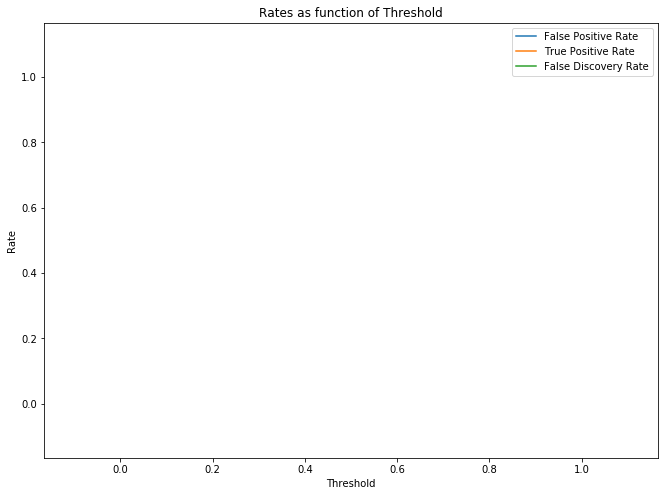

In [99]:
# line 1 points
x1 = threshold
y1 = FPR_lst
# plotting the line 1 points 
plt.plot(x1, y1, label = "False Positive Rate")


# line 2 points
x2 = threshold
y2 = TPR_lst
# plotting the line 2 points 
plt.plot(x2, y2, label = "True Positive Rate")

# line 3 points
x3 = threshold
y3 = FDR_lst
# plotting the line 2 points 
plt.plot(x3, y3, label = "False Discovery Rate")

plt.xlabel('Threshold')
# Set the y axis label of the current axis.
plt.ylabel('Rate')
# Set a title of the current axes.
plt.title('Rates as function of Threshold')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [100]:
rate_df = pd.DataFrame(data={'threshold':threshold,'TPR':TPR_lst,'FPR':FPR_lst,'FDR':FDR_lst})
rate_df.head()

,threshold,TPR,FPR,FDR
0,0.10,NaN,NaN,NaN
1,0.11,NaN,NaN,NaN
2,0.12,NaN,NaN,NaN
3,0.13,NaN,NaN,NaN
4,0.14,NaN,NaN,NaN


Text(0.5, 1.0, 'TPR vs. FPR')

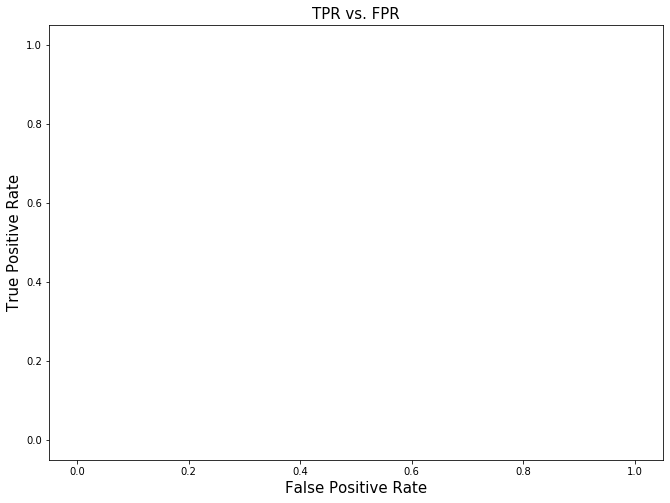

In [101]:
## TPR vs. FPR

## 45 degree line intercept
plt.plot(FPR_lst,TPR_lst)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('TPR vs. FPR',fontsize=15)

Text(0.5, 1.0, 'TPR vs. FDR')

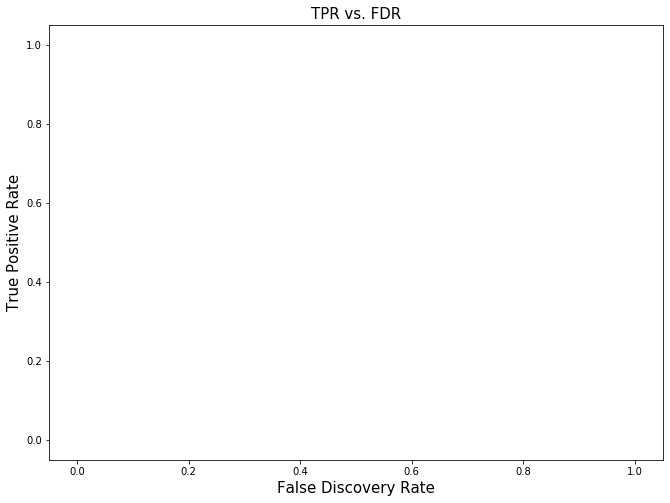

In [102]:
## TPR vs. FDR
plt.plot(FDR_lst,TPR_lst)
plt.xlabel('False Discovery Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('TPR vs. FDR',fontsize=15)

### TPR of 0.703700 at threshold of 0.48 seems to be a good blalance point between TPR vs. FPR and TPR vs. FDR

In [103]:
## optimal point is somewhere between 0.6 and 0.8 in this plot
rate_df[(rate_df['TPR'] >= 0.5) & (rate_df['TPR'] <= 0.8)]

,threshold,TPR,FPR,FDR
